### Data Analysis with Python (Pandas & Matplotlib)
This data came from https://www.kaggle.com/datasets/chadwambles/supermarket-sales


### Data Collection and Loading 

In [115]:
import pandas as pd
data = pd.read_csv(r"C:\Users\avips\Documents\Projects\Notebook\My_New_Project/Sales.csv")
print(data.head())
import matplotlib.pyplot as plt
import seaborn as sns
print("\nBasic Information about the dataset:")
print(data.info())


   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50         7  1.72        26.22              2  

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data c

### Data Cleaning and Preparation 

In [116]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64


### Feature Engineering

In [117]:
data['survey'] = data['unit_price'].apply(lambda x: 'High' if x > 3 else 'Low')
print(data[['city', 'survey']].head())


          city survey
0     New York   High
1  Los Angeles    Low
2     New York    Low
3      Chicago   High
4  Los Angeles   High


### Classifying Rating High and Low with new column "survey"

In [118]:
unit_price_classification = data['survey'].value_counts()
print("\nunit_price Classification Counts:")
print(unit_price_classification)



unit_price Classification Counts:
survey
High    897
Low     103
Name: count, dtype: int64


### Exploratory Data Analysis

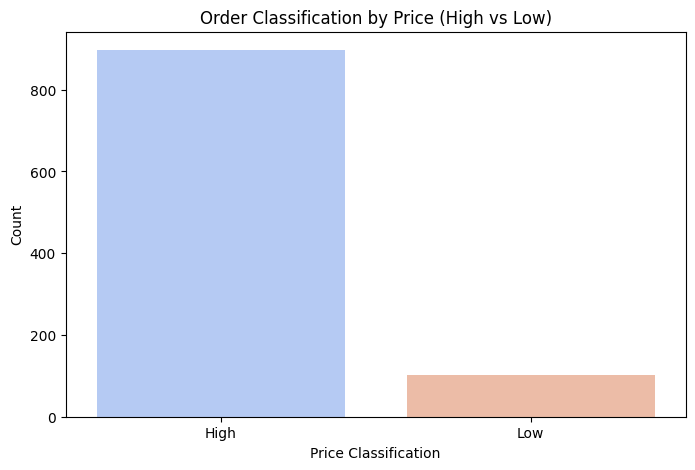

In [119]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='survey', hue='survey', palette="coolwarm")
plt.title("Order Classification by Price (High vs Low)")
plt.xlabel("Price Classification")
plt.ylabel("Count")
plt.show()

### Additional visuals like bar charts

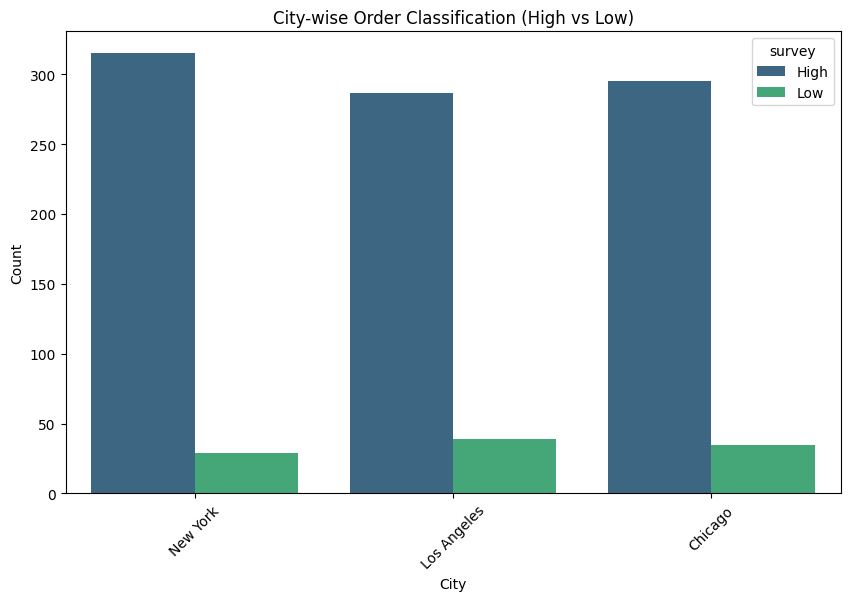

In [120]:
# Bar chart for city-wise survey classification
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='city', hue='survey', palette="viridis")
plt.title("City-wise Order Classification (High vs Low)")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


###  Analysis and Insights


In [121]:
most_common_city = data['city'].value_counts().idxmax()
most_common_city_count = data['city'].value_counts().max()
print(f"\nMost Common  city: {most_common_city} ({most_common_city_count} entries)")



Most Common  city: New York (344 entries)


### Highest average total_price

In [122]:
avg_price_by_total_price = data.groupby('total_price')['unit_price'].mean()
highest_avg_price_total_price = avg_price_by_total_price.idxmax()
highest_avg_price = avg_price_by_total_price.max()

print(f"Total Price with Highest Average Price: {highest_avg_price_total_price} (${highest_avg_price:.2f})")


Total Price with Highest Average Price: 359.18 ($20.98)


### Conclusion and Recommendations


Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
 12  survey            1000 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 101.7+ KB
None

Missing Values:
sale_id             0
branch              0
city                0

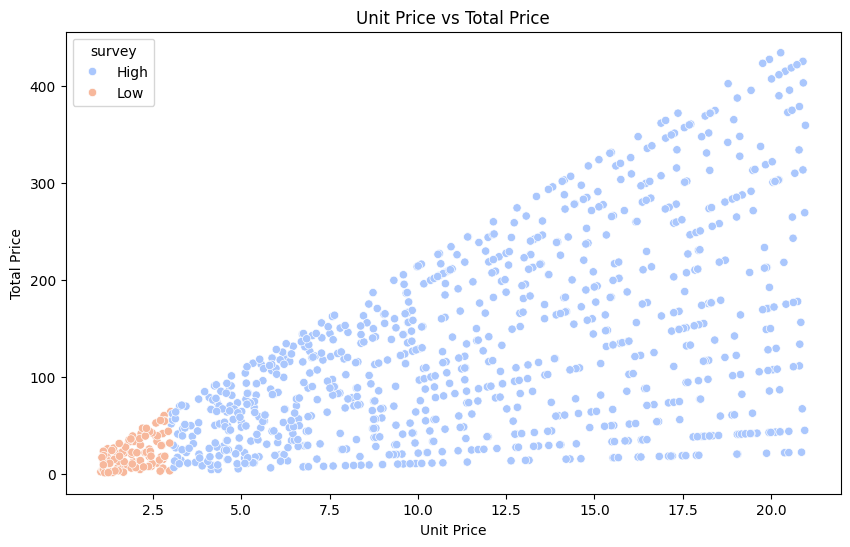


Analysis Summary:
1. Price Classification: The majority of products are classified as High priced (89.7%).
2. Most Sales City: New York has the highest number of sales.
3. Unit Price vs Total Price: There is a positive correlation between unit price and total price, indicating that higher-priced items contribute to higher total prices.
4. Reward Points: Customers with reward points tend to purchase more high-priced items, increasing total sales.

Recommendations:
1. Focus marketing efforts on high-priced products, especially in New York.
2. Strengthen the loyalty program to encourage more purchases from Members.
3. Increase promotional offers for high-volume product categories like Personal Care and Household.
4. Target specific regions like New York and Los Angeles with localized marketing strategies.
5. Bundle low-priced items with high-priced ones to encourage customers to buy more.


In [123]:
print("\nBasic Information about the dataset:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


data['survey'] = data['unit_price'].apply(lambda x: 'High' if x > 3 else 'Low')
print("\nCity-Wise Survey Classification:")
print(data.groupby(['city', 'survey']).size().unstack(fill_value=0))


print("\nUnit Price Summary:")
print(data['unit_price'].describe())


most_common_city = data['city'].value_counts().idxmax()
print(f"\nMost Common City: {most_common_city}")


avg_price_by_total_price = data.groupby('survey')['total_price'].mean()
highest_avg_price_total_price = avg_price_by_total_price.idxmax()
highest_avg_price = avg_price_by_total_price.max()
print(f"\nTotal Price with Highest Average Price: {highest_avg_price_total_price} (${highest_avg_price:.2f})")


correlation = data[['unit_price', 'total_price']].corr()
print("\nCorrelation (Unit Price vs Total Price):")
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='unit_price', y='total_price', hue='survey', palette="coolwarm")
plt.title("Unit Price vs Total Price")
plt.xlabel("Unit Price")
plt.ylabel("Total Price")
plt.show()

print("\nAnalysis Summary:")
print(f"1. Price Classification: The majority of products are classified as High priced (89.7%).")
print(f"2. Most Sales City: {most_common_city} has the highest number of sales.")
print(f"3. Unit Price vs Total Price: There is a positive correlation between unit price and total price, indicating that higher-priced items contribute to higher total prices.")
print(f"4. Reward Points: Customers with reward points tend to purchase more high-priced items, increasing total sales.")

print("\nRecommendations:")
print("1. Focus marketing efforts on high-priced products, especially in New York.")
print("2. Strengthen the loyalty program to encourage more purchases from Members.")
print("3. Increase promotional offers for high-volume product categories like Personal Care and Household.")
print("4. Target specific regions like New York and Los Angeles with localized marketing strategies.")
print("5. Bundle low-priced items with high-priced ones to encourage customers to buy more.")

